# Analyzing allrecipes users  


In [1]:
%matplotlib inline 

In [2]:
import pymongo 
import boto3 
from bs4 import BeautifulSoup as BS
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import community
import matplotlib.pyplot as plt
import networkx as nx

In [38]:
client = pymongo.MongoClient('mongodb://localhost:27017/')
allrecipes_db = client.allrecipes
members_coll = allrecipes_db.members
recipes_coll = allrecipes_db.recipes

In [53]:
# Schema 
members_coll.insert_one?

In [10]:
about_coll = allrecipes_db.about

In [26]:
member_pages_coll = allrecipes_db.member_pages

In [47]:
members_coll.update_one?

In [50]:
members_coll.update_one?

In [54]:
member_pages_coll.find_one().keys()

[u'favorites_page',
 u'following_page',
 u'reviews_page',
 u'aboutme_page',
 u'madeit_page',
 u'link',
 u'member_ID',
 u'followers_page',
 u'_id',
 u'recipes_page']

In [43]:
members_coll.find_one({'reviews_dict_list': {'$exists':True}})['reviews_dict_list']

[{u'recipe_ID': u'210083',
  u'recipe_link': u'/recipe/210083/moms-simple-dumplings/',
  u'recipe_rating': u'5',
  u'recipe_title': u"Mom's Simple Dumplings",
  u'review_text': u'I have not made this specific recipe yet.  I plan to as lost mine.  If your dumplings break up, try having your soup/stew simmering and not at a rolling boil.  Cook  the same, I do lid on for 10, then lid off for 10.  * Before scooping up the dumpling dough, dip the spoon, I use a serving spoon, into the soup/stew and then scoop a spoonful of batter and gently place into soup/stew by putting spoon into soup.   Then dip spoon again, and repeat.  This prevents the dough from sticking to the spoon.'},
 {u'recipe_ID': u'67952',
  u'recipe_link': u'/recipe/67952/roasted-brussels-sprouts/',
  u'recipe_rating': u'5',
  u'recipe_title': u'Roasted Brussels Sprouts',
  u'review_text': u"I detest Brussels sprouts.  This recipe made them edible and enjoyable, to a point. The darker the outside, the better, for those of us

In [13]:
list(about_coll.find())

[{u'_id': ObjectId('593b970c9d477a12500e6856'),
  u'recipes_filtered': [u'10141',
   u'10159',
   u'10217',
   u'103144',
   u'103170',
   u'10365',
   u'103674',
   u'10385',
   u'10396',
   u'10402',
   u'104869',
   u'104928',
   u'10517',
   u'10561',
   u'10638',
   u'10706',
   u'107613',
   u'10874',
   u'109899',
   u'11008',
   u'11019',
   u'11030',
   u'11032',
   u'11037',
   u'11162',
   u'11171',
   u'112239',
   u'11285',
   u'11345',
   u'11376',
   u'11382',
   u'11525',
   u'11587',
   u'116206',
   u'116306',
   u'116352',
   u'11646',
   u'116758',
   u'117418',
   u'11758',
   u'11760',
   u'11761',
   u'117663',
   u'11798',
   u'118175',
   u'118320',
   u'11864',
   u'119024',
   u'11914',
   u'119143',
   u'119152',
   u'119339',
   u'119442',
   u'11945',
   u'11966',
   u'11967',
   u'119689',
   u'11973',
   u'11989',
   u'12000',
   u'12008',
   u'12009',
   u'12033',
   u'120413',
   u'120425',
   u'120562',
   u'120639',
   u'120725',
   u'12126',
   u'12

In [9]:
members_coll.find({'madeits_dict':{'$exists':False}}).count()

92

In [5]:
members_coll.count()

906

In [6]:
members_coll.find({'member_ID':{'$exists':True}}).count()

906

In [8]:
allrecipes_db['community_page'].find_one().keys()

[u'_id', u'page']

## How are members connected?  Create a graph 
Try using gephi, using the [right format](https://gephi.org/users/supported-graph-formats/gml-format/)

In [11]:
# Find following, folloowers for each mmember
print members_coll.find_one()['followers_dict'].values()
print members_coll.find_one()['following_dict'].values()


[u'17995663', u'20923340', u'20455424']
[u'20923340', u'allrecipes']


In [9]:
members_coll.find_one()['member_ID']

u'17117019'

In [14]:
followers = members_coll.find_one()['following_dict'].values()

In [15]:
member = members_coll.find_one()['member_ID']
for a in followers: 
    print "{};{}".format(a,member)

20923340;17117019
allrecipes;17117019


In [21]:
members_coll.find({"member_ID": {"$exists": True}},["member_ID", "followers_dict"])[0]

{u'_id': ObjectId('58d1a3f99d477a1e01c32e9f'),
 u'followers_dict': {u'Ariel Penn': u'20455424',
  u'Debra Jenkins Schneider': u'17995663',
  u'Martha Schneider': u'20923340'},
 u'member_ID': u'17117019'}

In [32]:
import codecs

In [51]:
len(list(members_coll.find({"member_ID": {"$exists": True}},["member_ID", "followers_dict"])))

906

In [52]:
pwd

u'/Users/User1/DS/projects/food/src/data'

In [53]:
all_followers = members_coll.find({"member_ID": {"$exists": True}},["member_ID", "followers_dict"])
with codecs.open('member_adjacency.csv', encoding='utf-8',mode='w+') as f: 
    for n1, a1 in enumerate(all_followers):
        for a2 in a1.get("followers_dict").values():
            if a2 != "": 
                print n1, a2
                print "{},{}".format(a2,a1['member_ID'])
                f.write("{};{}\n".format(a2,a1['member_ID']))
            
    

0 17995663
17995663,17117019
0 20923340
20923340,17117019
0 20455424
20455424,17117019
1 11335258
11335258,5049040
1 570494
570494,5049040
1 4562668
4562668,5049040
1 1828332
1828332,5049040
1 21047293
21047293,5049040
1 mickdee
mickdee,5049040
1 shorecook
shorecook,5049040
1 7606430
7606430,5049040
1 6145350
6145350,5049040
1 christina
christina,5049040
1 5443447
5443447,5049040
1 whats-4-dinner-mom
whats-4-dinner-mom,5049040
1 bdweld
bdweld,5049040
1 1855262
1855262,5049040
1 3426677
3426677,5049040
1 motherann
motherann,5049040
1 melanieq
melanieq,5049040
1 2175240
2175240,5049040
1 finecuisine
finecuisine,5049040
1 littlebitesofbeauty
littlebitesofbeauty,5049040
2 9565295
9565295,460973
2 3663071
3663071,460973
9 14859898
14859898,14812504
9 6309226
6309226,14812504
15 15745708
15745708,2129429
15 20593714
20593714,2129429
15 12271663
12271663,2129429
15 18153047
18153047,2129429
15 21047293
21047293,2129429
15 14595055
14595055,2129429
15 13895661
13895661,2129429
15 15514417
1551

AttributeError: 'NoneType' object has no attribute 'values'

What are the most popular recipes in my collection?   
-histogram of "made-it" recipes

In [7]:
madeit_df = pd.DataFrame(list(members_coll.find({"madeits_recipe_id_list": {"$exists": True}},["member_ID", "madeits_recipe_id_list"])))

In [9]:
madeit_df.head()

,_id,madeits_recipe_id_list,member_ID
0,58d1a3f99d477a1e01c32e9f,[],17117019
1,58d1a3f99d477a1e01c32ea0,"[41637, 86801, 19812, 233078, 240948, 216572, ...",5049040
2,58d1a3f99d477a1e01c32ea1,"[11973, 98806, 134483, 9247]",460973
3,58d1a3f99d477a1e01c32ea2,"[34137, 80773, 237543, 177722]",9938141
4,58d1a3f99d477a1e01c32ea3,[],17190575


In [10]:
recipes_list = list(madeit_df.madeits_recipe_id_list)

In [12]:
recipes_list[1]

[u'41637',
 u'86801',
 u'19812',
 u'233078',
 u'240948',
 u'216572',
 u'241890',
 u'241621',
 u'21037',
 u'214474',
 u'16875',
 u'237454',
 u'87624',
 u'236670',
 u'45954',
 u'162836',
 u'78144',
 u'26659',
 u'46859']

In [18]:
recipes_list = [x for y in recipes_list for x in y]

In [26]:
recipes_counter = Counter(recipes_list)

In [29]:
recipes_counter.most_common(10)

[(u'10402', 10),
 (u'26317', 10),
 (u'56927', 10),
 (u'23600', 9),
 (u'162760', 8),
 (u'9023', 8),
 (u'51283', 7),
 (u'7565', 7),
 (u'14231', 7),
 (u'10813', 7)]

In [30]:
pop_rec_df = pd.DataFrame.from_dict(recipes_counter, orient='index')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1122e3b90>]], dtype=object)

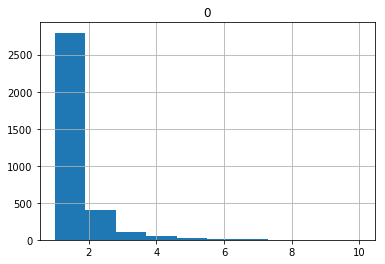

In [31]:
pop_rec_df.hist()


In [35]:
recipes_coll.find_one().keys()

[u'recipe_times',
 u'nutrition_elements',
 u'name',
 u'nutrition_serving_info',
 u'description',
 u'servings_config',
 u'recipe_ID',
 u'rating_list',
 u'servings',
 u'nutrition_info',
 u'_id',
 u'page',
 u'directions_list',
 u'ingredients_list']

In [36]:
recipes_coll.find_one({"recipe_ID":"10402"},["name"])

{u'_id': ObjectId('58d9ee771bc9b2453dcc1590'),
 u'name': [u'The Best Rolled Sugar Cookies']}

In [37]:
recipes_coll.find_one({"recipe_ID":"26317"},["name"])

{u'_id': ObjectId('58d9fb511bc9b2453dcc29af'),
 u'name': [u'Chicken Pot Pie IX']}

In [39]:
recipes_coll.find_one({"recipe_ID":"56927"},["name"])

{u'_id': ObjectId('58da030b1bc9b2453dcc3508'),
 u'name': [u'Delicious Ham and Potato Soup']}

In [40]:
recipes_coll.find_one({"recipe_ID":"23600"},["name"])

{u'_id': ObjectId('58d9f1641bc9b2453dcc1aea'),
 u'name': [u"World's Best Lasagna"]}

In [41]:
recipes_coll.find_one({"recipe_ID":"162760"},["name"])

{u'_id': ObjectId('58d9ef841bc9b2453dcc177b'), u'name': [u'Fluffy Pancakes']}

In [44]:
recipes_coll.find_one({"recipe_ID":"9023"})

In [46]:
recipes_coll.find_one({"recipe_ID":"51283"},["name"])

{u'_id': ObjectId('58d9f2391bc9b2453dcc1c76'), u'name': [u'Maple Salmon']}

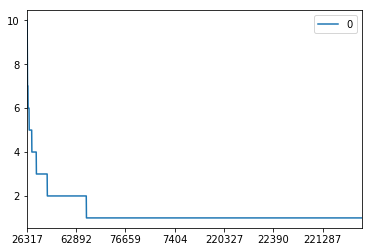

In [59]:
pop_rec_df.sort_values(by=0, ascending=False).plot()


In [61]:
pop_rec_df.sort_values(by=0,ascending=False).head()

,0
26317,10
10402,10
56927,10
23600,9
162760,8
